# CLUSTERING NEIGHBOURHOODS IN MADRID - LUIS MdP

## TABLE OF CONTENTS

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">INTRODUCTION – BUSINESS PROBLEM</a>

2. <a href="#item2">DATA</a>

3. <a href="#item3">METHODOLOGY</a>

4. <a href="#item4">CODE AND RESULTS</a>

5. <a href="#item5">DISCUSSION</a>
    
6. <a href="#item6">CONCLUSION</a>     
</font>
</div>

## 1. INTRODUCTION – BUSINESS PROBLEM
The objective of this project is to help investors to find the best area for opening a restaurant in Madrid, Spain.
Madrid is the largest Spanish city with more than 3 million inhabitants in a metropolitan area of approximately 600 square kilometers, and it is indeed a very good place to open a restaurant, thanks to its busy business centers, and lively streets either by day or night.
Madrid is administratively divided in 21 districts (“distritos” in Spanish), and 131 wards (“barrios” in Spanish). 
Thanks to the data from several Madrid City Hall webpages and Foursquare, and an appropriate data science approach, at the end of the project stakeholders will have the proper information to select the best wards and the best kind of restaurant to invest in.

## 2. DATA
Based on the objective of the business problem, the following data will be retrieved:

• Information of the administrative distribution in district and wards. This information will be obtained from the Madrid City Hall official website.

• Information of all of the district such as population, size (area), average income, number of crimes, or number of hotel beds.

• Information of the coordinates of every ward by geocoding

• Information about the type and location of restaurants from Foursquare API


## 3. METHODOLOGY
In order to accomplish this objective, three main phases will be considered:

1. Selecting the best “distritos” to open a restaurant. This selection will be done by clustering the “distritos based on its size, population, average income, number of crimes per year, and number of hotel beds (as a good indicator of tourism).

2. Selecting the best “barrios” to open a restaurant within the best “distritos” selected in phase 1. This selection will be done by clustering the “barrios” based on the number of restaurants and type.

3. Selecting the best three types of restaurant to invest in, considering the clusters created in phase 2, based on the less common kinds of restaurants of each cluster.

Phases 1 and 2 will be developed by clustering the "distritos" and "barrios" respectively, using the k-mean method (as it is an unlabled problem), optimizing the number of clusters usign the elbow method.

## 4. CODE AND RESULTS 
In this section the code and main results ares presented, following the steps described in section 3.

First of all, we are going to retreived information about the administrative division of Madrid from Wikipedia (https://es.wikipedia.org/wiki/Anexo:Barrios_administrativos_de_Madrid).

In [10]:
# install lxml:
!conda install -c conda-forge lxml --yes
print('lxml installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

lxml installed!


In [3]:
import pandas as pd
import numpy as np

# url = 'https://en.wikipedia.org/wiki/List_of_wards_of_Madrid' - I decided to change the webpage, 
# since it was obsolete

url = 'https://es.wikipedia.org/wiki/Anexo:Barrios_administrativos_de_Madrid'
MAD_wards_list=pd.read_html(url)

In [4]:
MAD_wards = MAD_wards_list[0]
MAD_wards.head()

,Distrito,Número,Nombre,Superficie (km²)[2]​,Imagen
0,Centro,11,Palacio,"1,471 km²",NaN
1,Centro,12,Embajadores,"1,032 km²",NaN
2,Centro,13,Cortes,"0,592 km²",NaN
3,Centro,14,Justicia,"0,742 km²",NaN
4,Centro,15,Universidad,"0,947 km²",NaN


In [5]:
MAD_wards.shape

(131, 5)

In [6]:
# Drop Image column
MAD_wards.drop(['Imagen'], axis='columns', inplace=True)
MAD_wards.head()

,Distrito,Número,Nombre,Superficie (km²)[2]​
0,Centro,11,Palacio,"1,471 km²"
1,Centro,12,Embajadores,"1,032 km²"
2,Centro,13,Cortes,"0,592 km²"
3,Centro,14,Justicia,"0,742 km²"
4,Centro,15,Universidad,"0,947 km²"


In [7]:
MAD_wards.columns

Index(['Distrito', 'Número', 'Nombre', 'Superficie (km²)[2]​'], dtype='object')

In [8]:
# Drop Superfice (Surface) column, since it is not necessary at this stage
MAD_wards.drop(['Superficie (km²)[2]​'], axis='columns', inplace=True)
MAD_wards.head()

,Distrito,Número,Nombre
0,Centro,11,Palacio
1,Centro,12,Embajadores
2,Centro,13,Cortes
3,Centro,14,Justicia
4,Centro,15,Universidad


In [9]:
# Changing the name of the columns
MAD_wards.columns = ['Distrito', 'Num_Barrio', 'Barrio']
MAD_wards.head()

,Distrito,Num_Barrio,Barrio
0,Centro,11,Palacio
1,Centro,12,Embajadores
2,Centro,13,Cortes
3,Centro,14,Justicia
4,Centro,15,Universidad


In [10]:
# Former code from IMB Watson Studio to upload information from local laptop

# import types
# import pandas as pd
# from botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

# client_8a1963a9212a42b386e21064ec2641c5 = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='pMfEMb4haQUCmAbsl5a6HpHwfQ3BMBOm8RY7HOOqtbw8',
#     ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

# body = client_8a1963a9212a42b386e21064ec2641c5.get_object(Bucket='courseracapstone-donotdelete-pr-zpipihckaeksqz',Key='Madrid_Distritos_info.csv')['Body']
## add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
# df_data_0 = pd.read_csv(body)
# df_data_0.head()

In [11]:
# Information retreived from Madrid City Hall pages

df_data_0 = pd.read_csv('Madrid_Distritos_info.csv')

In [12]:
df_data_0.head(21)

,Distrito,Num_Distrito,Renta (Euro/hab),Poblacion,Pob(0_15),Pob(16_79),Pob(80_),Superf. (Ha),Dens. Pob(hab/Ha),Plazas Hotel,Dens. Plazas Hotel (num/1000 hab),Delitos,Delitos/1000 hab
0,Centro,1,16147,134881,11171,116261,7449,522.82,257.99,27865,206.59,3542,26.26
1,Arganzuela,2,17306,153830,12740,132595,8495,646.22,238.05,2458,15.98,570,3.71
2,Retiro,3,21504,119379,9887,102899,6593,546.62,218.39,2750,23.04,293,2.45
3,Salamanca,4,24433,146148,12104,125973,8071,539.24,271.03,8965,61.34,956,6.54
4,Chamartin,5,25969,145865,12081,125728,8056,917.55,158.97,4481,30.72,647,4.44
5,Tetuan,6,14970,157937,13081,136134,8722,537.47,293.85,5030,31.85,514,3.25
6,Chamberi,7,22499,139448,11549,120198,7701,467.92,298.02,5023,36.02,580,4.16
7,Fuencarral-El Pardo,8,18573,246021,20376,212058,13587,23783.84,10.34,2866,11.65,289,1.17
8,Moncloa-Aravaca,9,22152,119423,9891,102937,6595,4653.11,25.67,3479,29.13,380,3.18
9,Latina,10,12232,238154,19724,205278,13152,2542.72,93.66,328,1.38,576,2.42


In [13]:
# Density information is not necessary, since k-mean method will be used, so this information is not going to
# help in the clustering phase.
# Only population between 16 and 79 years will be used, since it is decided to be more appropiate for this 
# type of study.
# For clustering it is important to use only a value table, so "Distrito" and "Num_Distrito" must be deleted.

In [14]:
X=df_data_0.drop(['Distrito','Num_Distrito','Poblacion','Pob(0_15)','Pob(80_)','Dens. Pob(hab/Ha)','Dens. Plazas Hotel (num/1000 hab)','Delitos/1000 hab'],axis=1)
X.head()

,Renta (Euro/hab),Pob(16_79),Superf. (Ha),Plazas Hotel,Delitos
0,16147,116261,522.82,27865,3542
1,17306,132595,646.22,2458,570
2,21504,102899,546.62,2750,293
3,24433,125973,539.24,8965,956
4,25969,125728,917.55,4481,647


In [15]:
# The table must be standarized in order to have a better information for clustering

from sklearn.preprocessing import StandardScaler

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.01739538, -0.37576401, -0.48178085,  4.07374675,  4.12336115],
       [ 0.25260997, -0.03091454, -0.45654171, -0.23374671, -0.14987692],
       [ 1.10457792, -0.65786751, -0.47691301, -0.18424114, -0.54815651],
       [ 1.6990072 , -0.17072066, -0.47842245,  0.86944768,  0.40512641],
       [ 2.01073249, -0.17589319, -0.40104627,  0.10923196, -0.03916382],
       [-0.22147224,  0.04380214, -0.47878447,  0.20230922, -0.23039553],
       [ 1.30650934, -0.2926446 , -0.49300962,  0.20112244, -0.13549859],
       [ 0.50974275,  1.64673778,  4.27582267, -0.16457454, -0.55390784],
       [ 1.23608702, -0.65706524,  0.36299217, -0.06064675, -0.42306508],
       [-0.7771388 ,  1.5035959 , -0.06864835, -0.59486613, -0.14124992],
       [-1.05314557,  1.77446762, -0.30138232, -0.47635793,  0.71282256],
       [-1.35289703, -0.29169455, -0.42963563, -0.63453841,  0.3159808 ],
       [-1.32245511,  1.44199   , -0.28255932, -0.61419365,  0.48995853],
       [-0.42969499, -1.10863773, -0.4

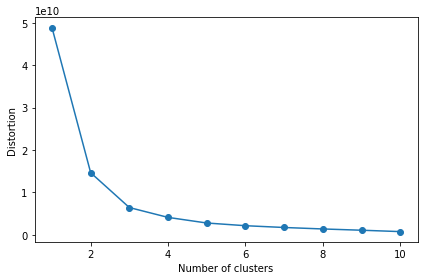

In [17]:
# In this section the optimum k will be considered by using the elbow method

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for clusterNum in range(1, 11):
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [18]:
# It is shown in the graph the the optimumu is 3, so clustering with k=3 is done.

clusterNum_opt = 3

k_means_opt = KMeans(init = "k-means++", n_clusters = clusterNum_opt, n_init = 12)
k_means_opt.fit(X)


labels = k_means_opt.labels_
print(labels)

[2 2 2 2 2 2 2 1 2 1 1 2 1 0 1 1 2 2 0 2 0]


We assign the labels to each row in dataframe.

In [19]:
MAD_Dist=X
MAD_Dist["Distritos_clust"] = labels
MAD_Dist.head(5)

,Renta (Euro/hab),Pob(16_79),Superf. (Ha),Plazas Hotel,Delitos,Distritos_clust
0,16147,116261,522.82,27865,3542,2
1,17306,132595,646.22,2458,570,2
2,21504,102899,546.62,2750,293,2
3,24433,125973,539.24,8965,956,2
4,25969,125728,917.55,4481,647,2


We can check the centroid values by averaging the features in each cluster.

In [20]:
MAD_Dist.groupby('Distritos_clust').mean()

,Renta (Euro/hab),Pob(16_79),Superf. (Ha),Plazas Hotel,Delitos
Distritos_clust,,,,,
0,14426.666667,61976.000000,2776.423333,1552.666667,215.333333
1,14091.166667,197749.333333,5518.800000,1335.000000,660.000000
2,17455.000000,120235.083333,1583.620000,5658.583333,796.083333


Cluster number 2 is chosen, because it is the highest income per inhabitant ("Renta" in Spanish), and it is the one with more hotel beds ("Plazas Hotel" in Spanish), so it is a good place to invest in a restaurant because the population has money and there are a lot of tourists.

In [21]:
# Merging data from the clusters and the former data
MAD_Dist_clust = MAD_Dist.merge(df_data_0)

In [23]:
MAD_Dist_clust.head()

,Renta (Euro/hab),Pob(16_79),Superf. (Ha),Plazas Hotel,Delitos,Distritos_clust,Distrito,Num_Distrito,Poblacion,Pob(0_15),Pob(80_),Dens. Pob(hab/Ha),Dens. Plazas Hotel (num/1000 hab),Delitos/1000 hab
0,16147,116261,522.82,27865,3542,2,Centro,1,134881,11171,7449,257.99,206.59,26.26
1,17306,132595,646.22,2458,570,2,Arganzuela,2,153830,12740,8495,238.05,15.98,3.71
2,21504,102899,546.62,2750,293,2,Retiro,3,119379,9887,6593,218.39,23.04,2.45
3,24433,125973,539.24,8965,956,2,Salamanca,4,146148,12104,8071,271.03,61.34,6.54
4,25969,125728,917.55,4481,647,2,Chamartin,5,145865,12081,8056,158.97,30.72,4.44


In [24]:
# Dropping the irrelevant info from the table.
Y=MAD_Dist_clust.drop(['Renta (Euro/hab)','Pob(16_79)','Superf. (Ha)','Plazas Hotel','Delitos','Poblacion','Pob(0_15)','Pob(80_)','Dens. Pob(hab/Ha)','Dens. Plazas Hotel (num/1000 hab)','Delitos/1000 hab'],axis=1)
Y.head()

,Distritos_clust,Distrito,Num_Distrito
0,2,Centro,1
1,2,Arganzuela,2
2,2,Retiro,3
3,2,Salamanca,4
4,2,Chamartin,5


In [25]:
# Merging data tables
Z = Y.merge(MAD_wards, on="Distrito")
Z.head()

,Distritos_clust,Distrito,Num_Distrito,Num_Barrio,Barrio
0,2,Centro,1,11,Palacio
1,2,Centro,1,12,Embajadores
2,2,Centro,1,13,Cortes
3,2,Centro,1,14,Justicia
4,2,Centro,1,15,Universidad


In [26]:
Z.shape

(109, 5)

In [27]:
Z.tail(10)

,Distritos_clust,Distrito,Num_Distrito,Num_Barrio,Barrio
99,2,San Blas-Canillejas,20,204,Arcos
100,2,San Blas-Canillejas,20,205,Rosas
101,2,San Blas-Canillejas,20,206,Rejas
102,2,San Blas-Canillejas,20,207,Canillejas
103,2,San Blas-Canillejas,20,208,Salvador
104,0,Barajas,21,211,Alameda de Osuna
105,0,Barajas,21,212,Aeropuerto
106,0,Barajas,21,213,Casco Histórico de Barajas
107,0,Barajas,21,214,Timón
108,0,Barajas,21,215,Corralejos


Now, only wards in cluster 2 will be picked to follow with the study.

In [35]:
MAD=Z[Z['Distritos_clust'] == 2]

In [36]:
MAD.head()

,Distritos_clust,Distrito,Num_Distrito,Num_Barrio,Barrio
0,2,Centro,1,11,Palacio
1,2,Centro,1,12,Embajadores
2,2,Centro,1,13,Cortes
3,2,Centro,1,14,Justicia
4,2,Centro,1,15,Universidad


In [37]:
MAD.shape

(55, 5)

In [38]:
MAD

,Distritos_clust,Distrito,Num_Distrito,Num_Barrio,Barrio
0,2,Centro,1,11,Palacio
1,2,Centro,1,12,Embajadores
2,2,Centro,1,13,Cortes
3,2,Centro,1,14,Justicia
4,2,Centro,1,15,Universidad
5,2,Centro,1,16,Sol
6,2,Arganzuela,2,21,Imperial
7,2,Arganzuela,2,22,Acacias
8,2,Arganzuela,2,23,Chopera
9,2,Arganzuela,2,24,Legazpi


In [39]:
# Reseting the index
MAD.reset_index(inplace=True)

In [40]:
MAD.head()

,index,Distritos_clust,Distrito,Num_Distrito,Num_Barrio,Barrio
0,0,2,Centro,1,11,Palacio
1,1,2,Centro,1,12,Embajadores
2,2,2,Centro,1,13,Cortes
3,3,2,Centro,1,14,Justicia
4,4,2,Centro,1,15,Universidad


In [41]:
# Dropping the columns that are not going to be used in the following phase of the study
MAD_1=MAD.drop(['Distritos_clust','Distrito','Num_Distrito','Num_Barrio'],axis=1)
MAD_1.head()

,index,Barrio
0,0,Palacio
1,1,Embajadores
2,2,Cortes
3,3,Justicia
4,4,Universidad


In [42]:
MAD_1.shape

(55, 2)

In [43]:
MAD_1

,index,Barrio
0,0,Palacio
1,1,Embajadores
2,2,Cortes
3,3,Justicia
4,4,Universidad
5,5,Sol
6,6,Imperial
7,7,Acacias
8,8,Chopera
9,9,Legazpi


In [44]:
MAD_1.drop(['index'],axis=1,inplace=True)

In [45]:
MAD_1

,Barrio
0,Palacio
1,Embajadores
2,Cortes
3,Justicia
4,Universidad
5,Sol
6,Imperial
7,Acacias
8,Chopera
9,Legazpi


Now, it is time for retreiving the coordinates of each ward.

In this part, I am going to create a new dataframe with the latitude and longitude of each neighbourhood, using geocoder.

In [46]:
# install geocoder:
!conda install -c conda-forge geocoder --yes
print('geocoder installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

geocoder installed!


In [47]:
import requests
import geocoder # to retrieve latitude and longitude
import csv
import json

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [48]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [49]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Checking that geolocator is working fine

address = 'MADRID, SPAIN'

geolocator = Nominatim(user_agent="ny_explorer")
location=None
while(location is None):
    location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


In [50]:
address_1='Amposta, Madrid, Spain'

# Checking that geolocator can find the coordinates from the name of the wards

location_1=None
while(location_1 is None):
    location_1 = geolocator.geocode(address_1)

latitude_1 = location_1.latitude
longitude_1 = location_1.longitude
print('The geograpical coordinate of Centro, Madrid are {}, {}.'.format(latitude_1, longitude_1))

The geograpical coordinate of Centro, Madrid are 40.4259727, -3.62227306026854.


In [51]:
geolocator = Nominatim(user_agent="ny_explorer")
def getLatLon(address):
    location = None
    while(location is None): 
        location = geolocator.geocode(address, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    return latitude, longitude

In [52]:
# Retreiving the coordinates of all the wards of cluster 2

latlon=pd.DataFrame(columns=['latitude','longitude'])
for nbh in MAD_1.Barrio:
    #print(nbh)
    lat, lon = getLatLon(nbh+', Madrid, Spain')
    #print("{} {}".format(lat, lon))
    latlon = latlon.append({'latitude':lat,'longitude':lon}, ignore_index=True)
    #print(latlon)
    
latlon

The geograpical coordinate of Palacio, Madrid, Spain are 40.41512925, -3.71561799839909.
The geograpical coordinate of Embajadores, Madrid, Spain are 40.40968055, -3.70164442641322.
The geograpical coordinate of Cortes, Madrid, Spain are 40.4143476, -3.69852518277385.
The geograpical coordinate of Justicia, Madrid, Spain are 40.4239569, -3.69574732085505.
The geograpical coordinate of Universidad, Madrid, Spain are 40.4252644, -3.70660596905568.
The geograpical coordinate of Sol, Madrid, Spain are 40.4178272, -3.70222208991507.
The geograpical coordinate of Imperial, Madrid, Spain are 40.4069151, -3.71732906254996.
The geograpical coordinate of Acacias, Madrid, Spain are 40.4040749, -3.7059572.
The geograpical coordinate of Chopera, Madrid, Spain are 40.5672903, -4.2266406.
The geograpical coordinate of Legazpi, Madrid, Spain are 40.3911717, -3.6951902.
The geograpical coordinate of Delicias, Madrid, Spain are 40.39729215, -3.68949484969473.
The geograpical coordinate of Palos de Mogue

,latitude,longitude
0,40.415129,-3.715618
1,40.409681,-3.701644
2,40.414348,-3.698525
3,40.423957,-3.695747
4,40.425264,-3.706606
5,40.417827,-3.702222
6,40.406915,-3.717329
7,40.404075,-3.705957
8,40.567290,-4.226641
9,40.391172,-3.695190


In [53]:
MAD_2 = pd.concat([MAD_1,latlon],axis=1)
MAD_2

,Barrio,latitude,longitude
0,Palacio,40.415129,-3.715618
1,Embajadores,40.409681,-3.701644
2,Cortes,40.414348,-3.698525
3,Justicia,40.423957,-3.695747
4,Universidad,40.425264,-3.706606
5,Sol,40.417827,-3.702222
6,Imperial,40.406915,-3.717329
7,Acacias,40.404075,-3.705957
8,Chopera,40.567290,-4.226641
9,Legazpi,40.391172,-3.695190


In [54]:
MAD_2.shape

(55, 3)

#### Creating a map of MADRID with wards superimposed on top.

In [55]:
# install folium:
!conda install -c conda-forge folium=0.5.0
print('folium installed!')

import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

folium installed!


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
# create map of Madrid using latitude and longitude values
map_MADRID = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(MAD_2['latitude'], MAD_2['longitude'], MAD_2['Barrio']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MADRID)  
    
map_MADRID

Now I will use FourSquare query to cluster wards based on the venues information

In [58]:
# @hidden_cell

CLIENT_ID = 'K23ALSECZRLBI0OTEWJ1RGI5M05W2NS0P0RBSCICVWWYCEWV'
CLIENT_SECRET = 'OVBZVBAHG1ILIZJ0RCPRPIV4ZRK2WA4MNWPLRT5SQUOY53PR'
VERSION = '20180605'


Now, let's get the top 100 venues that are in every ward in cluster 2 of Madrid within a radius of 500 meters.

In [59]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [60]:
MAD_venues = getNearbyVenues(names=MAD_2['Barrio'],
                                   latitudes=MAD_2['latitude'],
                                   longitudes=MAD_2['longitude']
                                  )

Palacio
Embajadores
Cortes
Justicia
Universidad
Sol
Imperial
Acacias
Chopera
Legazpi
Delicias
Palos de Moguer
Atocha
Pacífico
Adelfas
Estrella
Ibiza
Jerónimos
Niño Jesús
Recoletos
Goya
Fuente del Berro
La Guindalera
Lista
Castellana
Casa de Campo
Argüelles
Ciudad Universitaria
Valdezarza
Valdemarín
El Plantío
Aravaca
Orcasitas
Orcasur
San Fermín
Almendrales
Moscardó
Zofío
Pradolongo
Villaverde Alto
San Cristóbal
Butarque
Los Rosales
Los Ángeles
Casco Histórico de Vallecas
Santa Eugenia
Ensanche de Vallecas
Simancas
Hellín
Amposta
Arcos
Rosas
Rejas
Canillejas
Salvador


In [61]:
MAD_venues.shape

(1833, 7)

In [62]:
MAD_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio,40.415129,-3.715618,Plaza de La Almudena,40.416320,-3.713777,Plaza
2,Palacio,40.415129,-3.715618,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
3,Palacio,40.415129,-3.715618,Corral de la Morería,40.412619,-3.714249,Performing Arts Venue
4,Palacio,40.415129,-3.715618,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
5,Palacio,40.415129,-3.715618,Palacio Real de Madrid,40.417940,-3.714259,Palace
6,Palacio,40.415129,-3.715618,Tienda La Rebelión de los Mandiles,40.415133,-3.713358,Wine Shop
7,Palacio,40.415129,-3.715618,El Landó,40.411900,-3.715076,Spanish Restaurant
8,Palacio,40.415129,-3.715618,Mercado Jamón Iberico,40.415309,-3.711633,Market
9,Palacio,40.415129,-3.715618,Pizzeria Mayor,40.412789,-3.717474,Pizza Place


Getting information about the number of venues of each ward. We can see a lot of variation between wards, ones with less than 10 venues and others reaching the limit of 100.

In [63]:
MAD_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acacias,47,47,47,47,47,47
Adelfas,40,40,40,40,40,40
Almendrales,17,17,17,17,17,17
Amposta,7,7,7,7,7,7
Aravaca,9,9,9,9,9,9
Arcos,17,17,17,17,17,17
Argüelles,65,65,65,65,65,65
Atocha,38,38,38,38,38,38
Butarque,4,4,4,4,4,4


In [64]:
print('There are {} uniques categories.'.format(len(MAD_venues['Venue Category'].unique())))

There are 218 uniques categories.


Analyzing each neighbourhood

In [65]:
# one hot encoding
MAD_onehot = pd.get_dummies(MAD_venues[['Venue Category']], prefix="", prefix_sep="")
MAD_onehot.head()

,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Event,Outdoor Sculpture,Paella Restaurant,Palace,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
# rename column 'Neighborhood' -> 'Neighborhood_onehot' to avoid misunderstandings:
MAD_onehot.rename(columns = {'Neighborhood':'Neighborhood_onehot'}, inplace = True)

In [67]:
# add neighborhood column back to dataframe
MAD_onehot.insert(loc=0, column='Neighborhood', value=MAD_venues['Neighborhood']) 
MAD_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Event,Outdoor Sculpture,Paella Restaurant,Palace,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Palacio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Palacio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Palacio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [68]:
MAD_onehot.shape

(1833, 219)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [69]:
MAD_grouped = MAD_onehot.groupby('Neighborhood').mean().reset_index()
MAD_grouped

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Event,Outdoor Sculpture,Paella Restaurant,Palace,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Acacias,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.063830,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.042553,0.106383,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.021277,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.00000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.021277,0.021277,0.021277,0.021277,0.00,0.000000,0.00,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [70]:
MAD_grouped.shape

(48, 219)

Let's print each neighborhood along with the top 5 most common venues

In [71]:
num_top_venues = 5

for hood in MAD_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = MAD_grouped[MAD_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acacias----
                venue  freq
0                 Bar  0.11
1    Tapas Restaurant  0.09
2         Pizza Place  0.09
3         Art Gallery  0.06
4  Spanish Restaurant  0.06


----Adelfas----
                  venue  freq
0    Spanish Restaurant  0.10
1                   Bar  0.08
2  Fast Food Restaurant  0.05
3         Grocery Store  0.05
4                 Hotel  0.05


----Almendrales----
                  venue  freq
0    Spanish Restaurant  0.24
1    Seafood Restaurant  0.12
2                   Pub  0.06
3  Fast Food Restaurant  0.06
4                   Bar  0.06


----Amposta----
                venue  freq
0  Spanish Restaurant  0.14
1                Food  0.14
2         Supermarket  0.14
3                Café  0.14
4         Music Venue  0.14


----Aravaca----
                venue  freq
0          Restaurant  0.22
1               Diner  0.11
2  Italian Restaurant  0.11
3        Soccer Field  0.11
4            Pharmacy  0.11


----Arcos----
            venue  freq
0   

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
MAD_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
MAD_neighborhoods_venues_sorted['Neighborhood'] = MAD_grouped['Neighborhood']

for ind in np.arange(MAD_grouped.shape[0]):
    MAD_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(MAD_grouped.iloc[ind, :], num_top_venues)
    
MAD_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acacias,Bar,Pizza Place,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Bakery,Snack Place,Burger Joint,Skate Park
1,Adelfas,Spanish Restaurant,Bar,Tapas Restaurant,Fast Food Restaurant,Hotel,Grocery Store,Supermarket,Brewery,Café,Gas Station
2,Almendrales,Spanish Restaurant,Seafood Restaurant,BBQ Joint,Nightclub,Noodle House,Gastropub,Chinese Restaurant,Grocery Store,Bar,Fast Food Restaurant
3,Amposta,Metro Station,Spanish Restaurant,Supermarket,Café,Food,Park,Music Venue,Electronics Store,Donut Shop,Furniture / Home Store
4,Aravaca,Restaurant,Deli / Bodega,Soccer Field,Pizza Place,Pharmacy,Financial or Legal Service,Diner,Italian Restaurant,Ice Cream Shop,Fabric Shop


In [74]:
MAD_neighborhoods_venues_sorted.shape

(48, 11)

### Clustering wards by venues

In order to chose the best k for clustering wards, elbow method is used considering 20 different k´s.

In [76]:
MAD_grouped_clustering = MAD_grouped.drop('Neighborhood', 1)

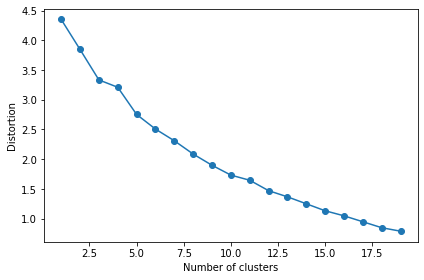

In [77]:
distortions_2 = []
for clusterNum_2 in range(1, 20):
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum_2, n_init = 12)
    k_means.fit(MAD_grouped_clustering)
    distortions_2.append(k_means.inertia_)

plt.plot(range(1, 20), distortions_2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

This time the elbow method is not very clear. k=10 is chosen as a good approach to this study.

In [79]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MAD_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 9, 0, 2, 2, 0, 9, 2, 6, 0, 9, 2, 0, 2, 9, 2, 0, 4, 0, 2,
       9, 2, 2, 2, 0, 9, 9, 3, 9, 2, 2, 2, 8, 0, 0, 1, 0, 7, 9, 2, 0, 2,
       2, 0, 2, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [80]:
MAD_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
MAD_neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Acacias,Bar,Pizza Place,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Bakery,Snack Place,Burger Joint,Skate Park
1,2,Adelfas,Spanish Restaurant,Bar,Tapas Restaurant,Fast Food Restaurant,Hotel,Grocery Store,Supermarket,Brewery,Café,Gas Station
2,2,Almendrales,Spanish Restaurant,Seafood Restaurant,BBQ Joint,Nightclub,Noodle House,Gastropub,Chinese Restaurant,Grocery Store,Bar,Fast Food Restaurant
3,9,Amposta,Metro Station,Spanish Restaurant,Supermarket,Café,Food,Park,Music Venue,Electronics Store,Donut Shop,Furniture / Home Store
4,0,Aravaca,Restaurant,Deli / Bodega,Soccer Field,Pizza Place,Pharmacy,Financial or Legal Service,Diner,Italian Restaurant,Ice Cream Shop,Fabric Shop
5,2,Arcos,Burger Joint,Lottery Retailer,Soccer Field,Multiplex,Shopping Mall,Chinese Restaurant,Sandwich Place,Clothing Store,Big Box Store,Optical Shop
6,2,Argüelles,Spanish Restaurant,Bar,Tapas Restaurant,Pub,Sandwich Place,Pizza Place,Gastropub,Supermarket,Bookstore,Burger Joint
7,0,Atocha,Restaurant,Bar,Spanish Restaurant,Italian Restaurant,Bakery,Café,Tapas Restaurant,Snack Place,Coffee Shop,Platform
8,9,Butarque,Plaza,Grocery Store,Park,Sports Bar,Yoga Studio,Financial or Legal Service,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium
9,2,Canillejas,Hotel,Plaza,Breakfast Spot,Café,Smoke Shop,Restaurant,Bakery,Spanish Restaurant,Pizza Place,Eastern European Restaurant


In [81]:
MAD_3=MAD_2

Finally, let's visualize the resulting clusters

In [82]:
MAD_3.rename(columns={"Barrio": "Neighborhood"},inplace=True)
MAD_3.head()

,Neighborhood,latitude,longitude
0,Palacio,40.415129,-3.715618
1,Embajadores,40.409681,-3.701644
2,Cortes,40.414348,-3.698525
3,Justicia,40.423957,-3.695747
4,Universidad,40.425264,-3.706606


In [83]:
# merge MAD_3 with MAD_neighborhoods_venues_sorted to add latitude/longitude for each neighborhood

MAD_3 = MAD_3.join(MAD_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

MAD_3.head()

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palacio,40.415129,-3.715618,2.0,Tapas Restaurant,Plaza,Spanish Restaurant,Historic Site,Bar,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Music Venue,Cocktail Bar
1,Embajadores,40.409681,-3.701644,2.0,Bar,Café,Tapas Restaurant,Hotel,Art Gallery,Hostel,Coffee Shop,Spanish Restaurant,Theater,Plaza
2,Cortes,40.414348,-3.698525,2.0,Spanish Restaurant,Hotel,Restaurant,Bar,Plaza,Theater,Café,Mediterranean Restaurant,Pizza Place,Bookstore
3,Justicia,40.423957,-3.695747,2.0,Spanish Restaurant,Restaurant,Bakery,Gay Bar,Hotel,Vegetarian / Vegan Restaurant,Italian Restaurant,Bar,Deli / Bodega,Tapas Restaurant
4,Universidad,40.425264,-3.706606,2.0,Café,Cocktail Bar,Bookstore,Tapas Restaurant,Argentinian Restaurant,Bar,Theater,Italian Restaurant,Restaurant,Breakfast Spot


In [84]:
MAD_3.shape

(55, 14)

In [85]:
MAD_3

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palacio,40.415129,-3.715618,2.0,Tapas Restaurant,Plaza,Spanish Restaurant,Historic Site,Bar,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Music Venue,Cocktail Bar
1,Embajadores,40.409681,-3.701644,2.0,Bar,Café,Tapas Restaurant,Hotel,Art Gallery,Hostel,Coffee Shop,Spanish Restaurant,Theater,Plaza
2,Cortes,40.414348,-3.698525,2.0,Spanish Restaurant,Hotel,Restaurant,Bar,Plaza,Theater,Café,Mediterranean Restaurant,Pizza Place,Bookstore
3,Justicia,40.423957,-3.695747,2.0,Spanish Restaurant,Restaurant,Bakery,Gay Bar,Hotel,Vegetarian / Vegan Restaurant,Italian Restaurant,Bar,Deli / Bodega,Tapas Restaurant
4,Universidad,40.425264,-3.706606,2.0,Café,Cocktail Bar,Bookstore,Tapas Restaurant,Argentinian Restaurant,Bar,Theater,Italian Restaurant,Restaurant,Breakfast Spot
5,Sol,40.417827,-3.702222,2.0,Spanish Restaurant,Hotel,Tapas Restaurant,Clothing Store,Restaurant,Plaza,Gourmet Shop,Art Museum,Gift Shop,Bookstore
6,Imperial,40.406915,-3.717329,2.0,Spanish Restaurant,Hotel,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place,Park,Garden,Spa,Monument / Landmark
7,Acacias,40.404075,-3.705957,2.0,Bar,Pizza Place,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Bakery,Snack Place,Burger Joint,Skate Park
8,Chopera,40.567290,-4.226641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Legazpi,40.391172,-3.695190,2.0,Spanish Restaurant,Bar,Plaza,Grocery Store,BBQ Joint,Park,Farmers Market,Restaurant,Café,Beer Garden


In [86]:
MAD_4=MAD_3.dropna()
MAD_4

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palacio,40.415129,-3.715618,2.0,Tapas Restaurant,Plaza,Spanish Restaurant,Historic Site,Bar,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Music Venue,Cocktail Bar
1,Embajadores,40.409681,-3.701644,2.0,Bar,Café,Tapas Restaurant,Hotel,Art Gallery,Hostel,Coffee Shop,Spanish Restaurant,Theater,Plaza
2,Cortes,40.414348,-3.698525,2.0,Spanish Restaurant,Hotel,Restaurant,Bar,Plaza,Theater,Café,Mediterranean Restaurant,Pizza Place,Bookstore
3,Justicia,40.423957,-3.695747,2.0,Spanish Restaurant,Restaurant,Bakery,Gay Bar,Hotel,Vegetarian / Vegan Restaurant,Italian Restaurant,Bar,Deli / Bodega,Tapas Restaurant
4,Universidad,40.425264,-3.706606,2.0,Café,Cocktail Bar,Bookstore,Tapas Restaurant,Argentinian Restaurant,Bar,Theater,Italian Restaurant,Restaurant,Breakfast Spot
5,Sol,40.417827,-3.702222,2.0,Spanish Restaurant,Hotel,Tapas Restaurant,Clothing Store,Restaurant,Plaza,Gourmet Shop,Art Museum,Gift Shop,Bookstore
6,Imperial,40.406915,-3.717329,2.0,Spanish Restaurant,Hotel,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place,Park,Garden,Spa,Monument / Landmark
7,Acacias,40.404075,-3.705957,2.0,Bar,Pizza Place,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Bakery,Snack Place,Burger Joint,Skate Park
9,Legazpi,40.391172,-3.695190,2.0,Spanish Restaurant,Bar,Plaza,Grocery Store,BBQ Joint,Park,Farmers Market,Restaurant,Café,Beer Garden
10,Delicias,40.397292,-3.689495,0.0,Coffee Shop,Chinese Restaurant,Restaurant,Mediterranean Restaurant,Bakery,Italian Restaurant,Snack Place,Breakfast Spot,Science Museum,Spanish Restaurant


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MAD_4['latitude'], MAD_4['longitude'], MAD_4['Neighborhood'], MAD_4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. DISCUSSION – EXAMINING CLUSTERS

In this section all clusters will be examined in order to conclude which one is the best for investing in a restaurant.

#### Cluster 1

In [88]:
MAD_4.loc[MAD_4['Cluster Labels'] == 0, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Delicias,Coffee Shop,Chinese Restaurant,Restaurant,Mediterranean Restaurant,Bakery,Italian Restaurant,Snack Place,Breakfast Spot,Science Museum,Spanish Restaurant
12,Atocha,Restaurant,Bar,Spanish Restaurant,Italian Restaurant,Bakery,Café,Tapas Restaurant,Snack Place,Coffee Shop,Platform
16,Ibiza,Spanish Restaurant,Tapas Restaurant,Italian Restaurant,Restaurant,Seafood Restaurant,Coffee Shop,Indian Restaurant,Café,Bakery,Gastropub
19,Recoletos,Restaurant,Spanish Restaurant,Italian Restaurant,Japanese Restaurant,Hotel,Clothing Store,Café,Shoe Store,Furniture / Home Store,Accessories Store
20,Goya,Spanish Restaurant,Restaurant,Bakery,Tapas Restaurant,Seafood Restaurant,Café,Mexican Restaurant,Bookstore,Snack Place,Chinese Restaurant
23,Lista,Spanish Restaurant,Restaurant,Seafood Restaurant,Hotel,Tapas Restaurant,Burger Joint,Coffee Shop,Mediterranean Restaurant,Japanese Restaurant,Plaza
24,Castellana,Spanish Restaurant,Restaurant,Coffee Shop,Boutique,Tapas Restaurant,Mediterranean Restaurant,Bistro,Furniture / Home Store,Japanese Restaurant,Cocktail Bar
29,Valdemarín,Restaurant,Spanish Restaurant,Asian Restaurant,Burger Joint,Breakfast Spot,Supermarket,Mexican Restaurant,Park,Bar,Bakery
31,Aravaca,Restaurant,Deli / Bodega,Soccer Field,Pizza Place,Pharmacy,Financial or Legal Service,Diner,Italian Restaurant,Ice Cream Shop,Fabric Shop
47,Simancas,Spanish Restaurant,Restaurant,Café,Hotel,Mediterranean Restaurant,Bar,Pharmacy,Park,Coffee Shop,Sandwich Place


#### Cluster 2

In [89]:
MAD_4.loc[MAD_4['Cluster Labels'] == 1, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Rosas,Gastropub,Electronics Store,Financial or Legal Service,Garden,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium,Food Truck


#### Cluster 3

In [90]:
MAD_4.loc[MAD_4['Cluster Labels'] == 2, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palacio,Tapas Restaurant,Plaza,Spanish Restaurant,Historic Site,Bar,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Music Venue,Cocktail Bar
1,Embajadores,Bar,Café,Tapas Restaurant,Hotel,Art Gallery,Hostel,Coffee Shop,Spanish Restaurant,Theater,Plaza
2,Cortes,Spanish Restaurant,Hotel,Restaurant,Bar,Plaza,Theater,Café,Mediterranean Restaurant,Pizza Place,Bookstore
3,Justicia,Spanish Restaurant,Restaurant,Bakery,Gay Bar,Hotel,Vegetarian / Vegan Restaurant,Italian Restaurant,Bar,Deli / Bodega,Tapas Restaurant
4,Universidad,Café,Cocktail Bar,Bookstore,Tapas Restaurant,Argentinian Restaurant,Bar,Theater,Italian Restaurant,Restaurant,Breakfast Spot
5,Sol,Spanish Restaurant,Hotel,Tapas Restaurant,Clothing Store,Restaurant,Plaza,Gourmet Shop,Art Museum,Gift Shop,Bookstore
6,Imperial,Spanish Restaurant,Hotel,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place,Park,Garden,Spa,Monument / Landmark
7,Acacias,Bar,Pizza Place,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Bakery,Snack Place,Burger Joint,Skate Park
9,Legazpi,Spanish Restaurant,Bar,Plaza,Grocery Store,BBQ Joint,Park,Farmers Market,Restaurant,Café,Beer Garden
11,Palos de Moguer,Spanish Restaurant,Restaurant,Beer Garden,Breakfast Spot,Brewery,Plaza,Tapas Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Garden


#### Cluster 4

In [91]:
MAD_4.loc[MAD_4['Cluster Labels'] == 3, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Orcasitas,Plaza,Café,Grocery Store,Sporting Goods Shop,Yoga Studio,Financial or Legal Service,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium


#### Cluster 5

In [92]:
MAD_4.loc[MAD_4['Cluster Labels'] == 4, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Hellín,Music Venue,Snack Place,Pharmacy,Gym,Park,Financial or Legal Service,French Restaurant,Fountain,Football Stadium,Food Truck


#### Cluster 6

In [93]:
MAD_4.loc[MAD_4['Cluster Labels'] == 5, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Zofío,Spanish Restaurant,Beer Garden,Athletics & Sports,Park,Flea Market,Garden,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain


#### Cluster 7

In [94]:
MAD_4.loc[MAD_4['Cluster Labels'] == 6, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Casa de Campo,BBQ Joint,Trail,Fast Food Restaurant,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium,Food Truck,Food & Drink Shop


#### Cluster 8

In [95]:
MAD_4.loc[MAD_4['Cluster Labels'] == 7, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,San Cristóbal,Furniture / Home Store,Train Station,Athletics & Sports,Park,Yoga Studio,Financial or Legal Service,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium


#### Cluster 9

In [96]:
MAD_4.loc[MAD_4['Cluster Labels'] == 8, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Pradolongo,Park,Burger Joint,Beer Garden,Theater,Yoga Studio,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium


#### Cluster 10

In [97]:
MAD_4.loc[MAD_4['Cluster Labels'] == 9, MAD_4.columns[[0] + list(range(4, MAD_4.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Jerónimos,Park,Fountain,Coffee Shop,Diner,Plaza,Monument / Landmark,Art Museum,Snack Place,Café,Church
18,Niño Jesús,Italian Restaurant,Park,Spanish Restaurant,Coffee Shop,Plaza,Dessert Shop,Bar,Supermarket,Chinese Restaurant,Mexican Restaurant
27,Ciudad Universitaria,Music Venue,Museum,Restaurant,Park,Bus Station,Garden,Plaza,IT Services,Indie Movie Theater,Football Stadium
33,Orcasur,Clothing Store,Pharmacy,Grocery Store,Farmers Market,Coffee Shop,Beer Garden,Fast Food Restaurant,Supermarket,Pizza Place,Diner
34,San Fermín,Furniture / Home Store,Metro Station,Pharmacy,Restaurant,Park,Clothing Store,Farmers Market,Fast Food Restaurant,Shopping Mall,Spanish Restaurant
36,Moscardó,Bakery,Restaurant,Coffee Shop,Clothing Store,Pool,Café,Big Box Store,Gastropub,Spanish Restaurant,Soccer Field
41,Butarque,Plaza,Grocery Store,Park,Sports Bar,Yoga Studio,Financial or Legal Service,Frozen Yogurt Shop,French Restaurant,Fountain,Football Stadium
46,Ensanche de Vallecas,Clothing Store,Coffee Shop,Fast Food Restaurant,Park,Sandwich Place,Boutique,Sushi Restaurant,Supermarket,Big Box Store,Metro Station
49,Amposta,Metro Station,Spanish Restaurant,Supermarket,Café,Food,Park,Music Venue,Electronics Store,Donut Shop,Furniture / Home Store


Clusters 2, 4, 5, 6, 7, 8, 9, and 10 seems to be a kind of suburb-kind of ward, so not many restaurants, and hotels, so it is very risky to invest in these loction if you do not know very well the place.

Clusters 1 and 3  have a lot of venues like bars, restaurants, hotels, museums, etc., so they are the ones that will be the best to invest in a restaurant. The final decision will be done depending on the type of restaurant the investors would like to open.

## 6. CONCLUSION

This report tries to help investors to choose the best wards in Madrid to open a restaurant. First of all, district´s info from different webpages has been retreived to select the districts with highest income and more tourist by clustering the districts by k-mean method, and optimizing k by elbow method. Then, using Foursquare service and geocode location, information about the venues in each ward of the selected districts was obtained. Using this info, wards were clustered using k-mean besed on the venues. Ten different clusters were chosen as optimum.

Finally clusters 1 and 3 were selected as the ones that will be the best to invest in a restaurant. The final decision will be done depending on the type of restaurant the investors would like to open, but a first advice it can be said that all types of restaurants could match, except a Spanish restaurant, since it seems Madrid is packed of them.